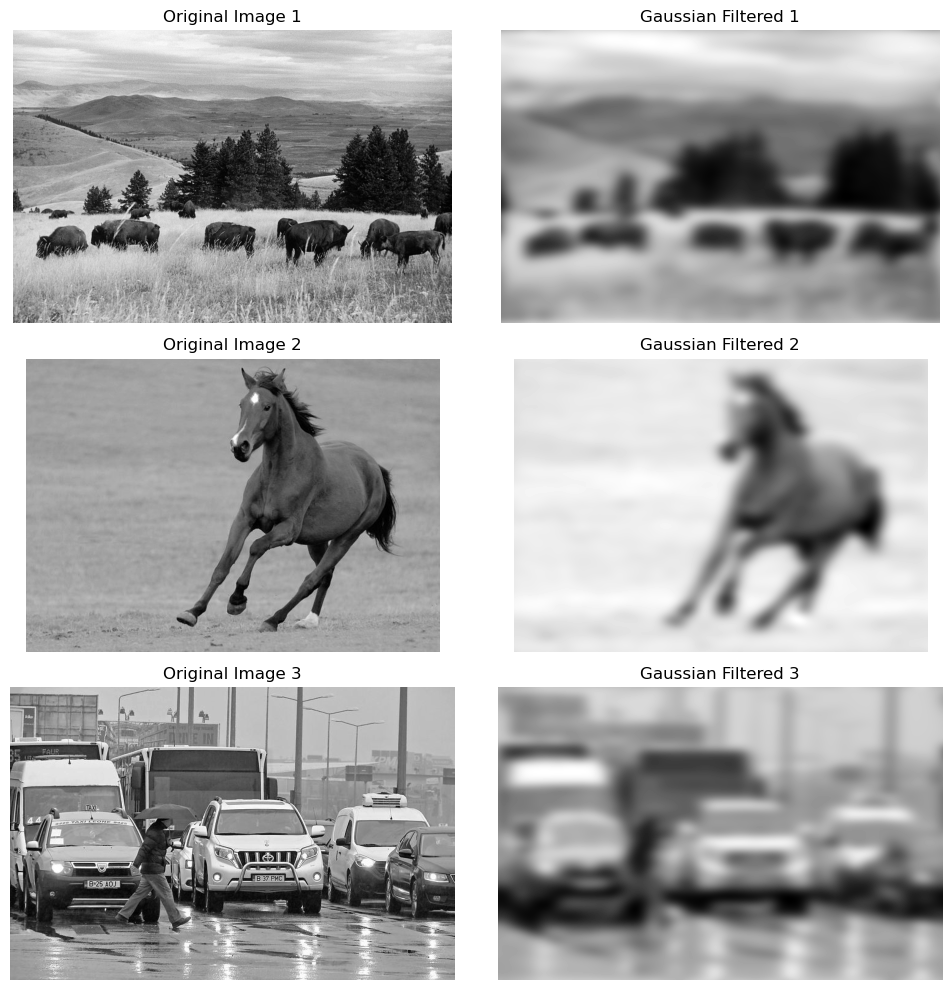

In [17]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
image_paths = [
    "C:/Users/ngtrd/Desktop/Sandipan_Dey_2018_Sample_Images/images/bisons.jpg",
    "C:/Users/ngtrd/Desktop/Sandipan_Dey_2018_Sample_Images/images/horse.jpg",
    "C:/Users/ngtrd/Desktop/Sandipan_Dey_2018_Sample_Images/images/cars.jpg"
]
plt.figure(figsize=(10, 10))
for idx, path in enumerate(image_paths):
    img = cv2.imread(path, 0)
    if img is None:
        print(f"Error: Cannot read image from path: {path}")
        continue

    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    sigma = 10
    gaussian_filter = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            gaussian_filter[i, j] = np.exp(-((i - crow)**2 + (j - ccol)**2) / (2 * sigma**2))

    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    filtered_dft = dft_shift * gaussian_filter[:, :, None]

    idft = cv2.idft(np.fft.ifftshift(filtered_dft))
    img_back = cv2.magnitude(idft[:, :, 0], idft[:, :, 1])

    plt.subplot(len(image_paths), 2, 2 * idx + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Original Image {idx + 1}')
    plt.axis('off')

    plt.subplot(len(image_paths), 2, 2 * idx + 2)
    plt.imshow(img_back, cmap='gray')
    plt.title(f'Gaussian Filtered {idx + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()
